In [1]:
from os.path import abspath, dirname, join, normpath, relpath
from mhkit.river.io import d3d 
from math import isclose
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4
import scipy.io
plt.rcParams.update({'font.size': 15}) # Set font size of plots title and labels 

In [2]:
# Downloading Data
datadir = normpath(join(relpath(join('data', 'simulation.dsproj_data', 'tanana50', 'output'))))
filename= 'tanana50_map.nc'
d3d_data = netCDF4.Dataset(join(datadir,filename)) 

# Printing variable and description
for var in d3d_data.variables.keys():
    try: 
        d3d_data[var].long_name
    except:
        print(f'"{var}"')        
    else:
        print(f'"{var}": {d3d_data[var].long_name}')

"mesh2d_enc_x": x-coordinate
"mesh2d_enc_y": y-coordinate
"mesh2d_enc_node_count": count of coordinates in each instance geometry
"mesh2d_enc_part_node_count": count of nodes in each geometry part
"mesh2d_enc_interior_ring": type of each geometry part
"mesh2d_enclosure_container"
"Mesh2D"
"NetNode_x": x-coordinate
"NetNode_y": y-coordinate
"projected_coordinate_system"
"NetNode_z": bed level at net nodes (flow element corners)
"NetLink": link between two netnodes
"NetLinkType": type of netlink
"NetElemNode": mapping from net cell to net nodes (counterclockwise)
"NetElemLink": mapping from net cell to its net links (counterclockwise)
"NetLinkContour_x": list of x-contour points of momentum control volume surrounding each net/flow link
"NetLinkContour_y": list of y-contour points of momentum control volume surrounding each net/flow link
"NetLink_xu": x-coordinate of net link center (velocity point)
"NetLink_yu": y-coordinate of net link center (velocity point)
"BndLink": netlinks that co

In [3]:
variable= 'ucx' 
var_data_df= d3d.get_all_data_points(d3d_data, variable, time_index=4)
print(var_data_df)


                   x             y  waterdepth  waterlevel       ucx    time
0      399977.780920  7.161733e+06    0.327979    2.212376 -0.655153  4800.0
1      399987.787225  7.161733e+06    0.337614    2.210838 -0.639946  4800.0
2      399976.977626  7.161749e+06    0.362592    2.212200 -0.694969  4800.0
3      399997.815934  7.161734e+06    0.347270    2.212493 -0.644871  4800.0
4      399986.882145  7.161749e+06    0.366117    2.210591 -0.679971  4800.0
...              ...           ...         ...         ...       ...     ...
11825  401212.479592  7.160735e+06    3.275365    2.424476 -0.112752  4800.0
11826  401217.019308  7.160752e+06    2.649840    2.426280  0.028669  4800.0
11827  401218.693149  7.160722e+06    3.366836    2.417756 -0.065275  4800.0
11828  401222.158795  7.160740e+06    2.826109    2.422828  0.072880  4800.0
11829  401228.105738  7.160727e+06    2.741992    2.420150 -0.011540  4800.0

[11830 rows x 6 columns]


In [4]:
xmin=var_data_df.x.max()
xmax=var_data_df.x.min()

ymin=var_data_df.y.max()
ymax=var_data_df.y.min()

zmin=var_data_df.waterdepth.max()
zmax=var_data_df.waterdepth.min()

In [17]:
Lat_long=open('lat_long.txt')
lat_long=Lat_long.readlines()
Lat= lat_long[0:579]
Long= lat_long[581:1160]
Lat = np.array(Lat)
Lat=Lat.astype(float)
Long = np.array(Long)
Long=Long.astype(float)



In [43]:
x_lat= np.tile(Lat, 100)
y_long= np.tile(Long, 100)
z_samples =np.repeat( np.linspace(zmin,zmax, num=100),579)
Point={'x': x_lat, 'y': y_long, 'waterdepth': z_samples}
points=pd.DataFrame(Point)
points

,x,y,waterdepth
0,400954.34,7161131.9,11.000111
1,400954.25,7161132.0,11.000111
2,400954.28,7161132.0,11.000111
3,400954.31,7161132.0,11.000111
4,400954.42,7161132.0,11.000111
...,...,...,...
57895,401097.17,7161177.2,0.160651
57896,401097.41,7161177.3,0.160651
57897,401097.60,7161177.3,0.160651
57898,401097.79,7161177.4,0.160651


[0, 1, 2]
points provided


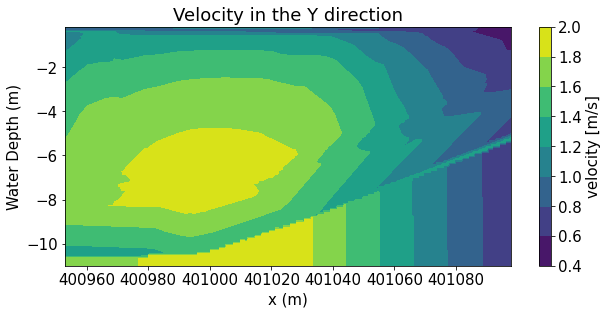

In [44]:
turbine_x_loc= 400993.57467338
turbine_y_loc= 7161237.67096936
turbine_diameter= 0.7
N=1
y_sample = turbine_y_loc+N*turbine_diameter
x_samples = np.linspace(turbine_x_loc-60, turbine_x_loc+60, num=40)
z_samples = np.linspace(zmin,zmax, num=256)

variables= ['ucy']
sample_points = d3d.create_points(x_samples, y_sample, z_samples) 

Var_sample= d3d.variable_interpolation(d3d_data, variables, points= points)

# Creating new plot limits 
max_plot_TI=27
min_plot_TI=0


# Plotting 
plt.figure(figsize=(10,4.4))
contour_plot = plt.tricontourf(
    Var_sample.x, 
    -Var_sample.waterdepth, 
    Var_sample.ucy,

)

plt.xlabel('x (m)')
plt.ylabel('Water Depth (m)')
plt.title('Velocity in the Y direction')
cbar= plt.colorbar(contour_plot)
cbar.set_label('velocity [m/s]')

In [24]:
sample_points

,x,waterdepth,y
0,400933.574673,11.000111,7.161238e+06
1,400936.651596,11.000111,7.161238e+06
2,400939.728520,11.000111,7.161238e+06
3,400942.805443,11.000111,7.161238e+06
4,400945.882366,11.000111,7.161238e+06
...,...,...,...
10235,401041.266981,0.160651,7.161238e+06
10236,401044.343904,0.160651,7.161238e+06
10237,401047.420827,0.160651,7.161238e+06
10238,401050.497750,0.160651,7.161238e+06


In [29]:
np.tile([1, 2,3,4],3)

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

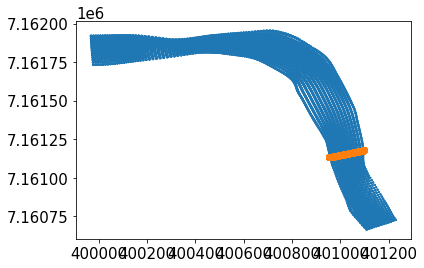

In [20]:
plt.scatter(var_data_df.x,var_data_df.y,var_data_df.waterdepth)
plt.scatter(Lat, Long)

In [18]:
np.size(Lat)

579

In [19]:
np.size(Long)

579